# Customer Shopping Trends 


### Import Python Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

### Load Data as a Dataframe

In [5]:
file_name = "shopping_trends.csv"
df = pd.read_csv(file_name,
                 encoding='utf-8',
                 header=0)

### View Dataframe

In [7]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Dataframe Info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [10]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [11]:
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Number of Rows: 3900
Number of Columns: 18


### Check for Null Values

In [13]:
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [14]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

### Check for Duplicates

In [16]:
df.duplicated().sum()

0

### Check out what Columns we have in this dataframe

In [18]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

### Histogram of Customer Age

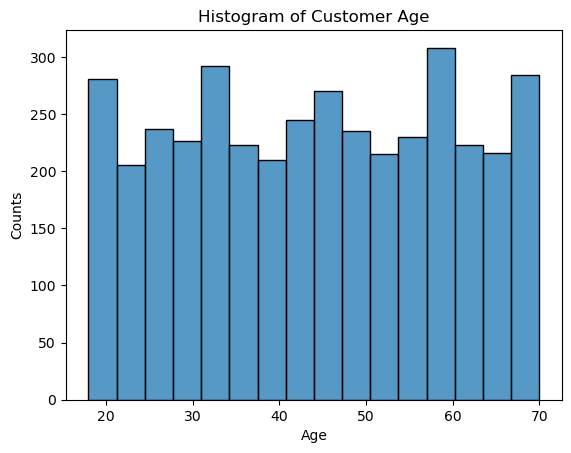

In [20]:
sns.histplot(x="Age",
             data=df)
plt.title("Histogram of Customer Age")
plt.xlabel("Age")
plt.ylabel("Counts")
plt.show()

### Barplot of Gender

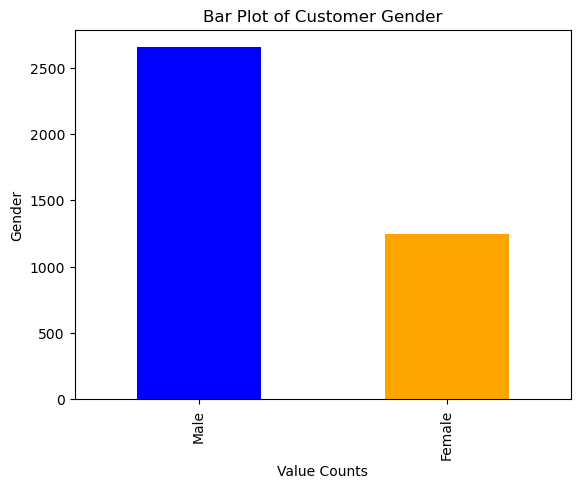

In [22]:
df["Gender"]. \
    value_counts(). \
    plot(
        kind = 'bar',
        color = ['blue', 'orange'])
plt.title("Bar Plot of Customer Gender")
plt.xlabel("Value Counts")
plt.ylabel("Gender")
plt.show()

### Purchased by Category

Which categories have the highest average purchase amount (in USD)?

In [25]:
res = df.groupby("Category")["Purchase Amount (USD)"]. \
                mean(). \
                sort_values(ascending=False)
res = pd.DataFrame(res)
res["Purchase Amount (USD)"] = res["Purchase Amount (USD)"]. \
                                    apply(lambda x: np.round(x, 2))
print(res)

             Purchase Amount (USD)
Category                          
Footwear                     60.26
Clothing                     60.03
Accessories                  59.84
Outerwear                    57.17


### Distribution of Subscription Counts

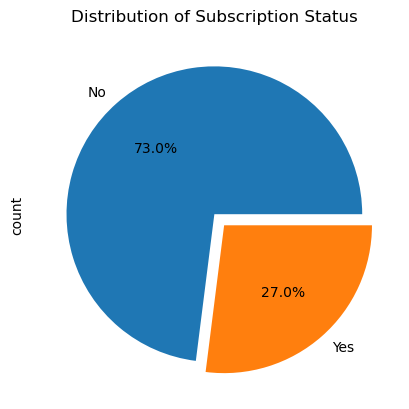

In [27]:
df["Subscription Status"].value_counts(). \
    plot(kind="pie",
         explode = (0, 0.1),
         autopct='%1.1f%%')
plt.title("Distribution of Subscription Status")
plt.show()

Almost 73% of the Customers do not seem to be subscribed.

### Purchased Amounts (USD) by Season

In [30]:
seasonal_purchases = df.groupby("Season")["Purchase Amount (USD)"]. \
                                        sum().sort_values(
                                                ascending=False)
seasonal_purchases = pd.DataFrame(seasonal_purchases)

# convert to percentages
total_sum = seasonal_purchases["Purchase Amount (USD)"].sum()
seasonal_purchases["Percentages"] = seasonal_purchases[
        "Purchase Amount (USD)"].apply(
            lambda x: np.round(
                ((x/total_sum) * 100), 2))
seasonal_purchases

,Purchase Amount (USD),Percentages
Season,,
Fall,60018,25.75
Spring,58679,25.18
Winter,58607,25.14
Summer,55777,23.93


### Box Plot of Purchase Amount by Frequency

<Figure size 1500x1200 with 0 Axes>

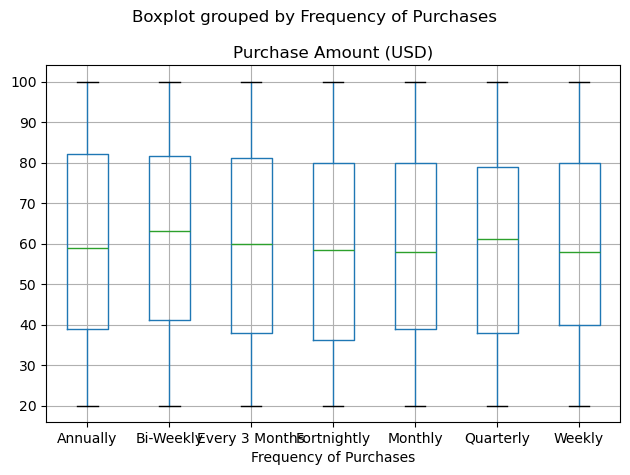

In [33]:
plt.figure(figsize=(15,12))
ax = df.boxplot(
        column="Purchase Amount (USD)",
        by="Frequency of Purchases")
# plt.title("Box Plot of Purchase Amount by Frequency")
plt.tight_layout()
plt.show()

### Preferred Payment Methods

In [35]:
pd.DataFrame(
    df["Payment Method"]. \
    value_counts(). \
    sort_values(ascending=False))

,count
Payment Method,
PayPal,677
Credit Card,671
Cash,670
Debit Card,636
Venmo,634
Bank Transfer,612


### Items Purchased by Location

In [38]:
pd.pivot_table(df,
               values = "Purchase Amount (USD)",
               index = "Location",
               columns = "Item Purchased",
               aggfunc = "mean"). \
               round(2).head(5)

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Location,,,,,,,,,,,,,,,,,,,,,
Alabama,74.0,26.50,52.0,73.67,54.50,55.20,85.00,57.67,76.00,53.00,...,75.33,48.2,54.33,49.00,68.67,79.50,93.50,62.67,40.50,52.50
Alaska,74.6,76.75,67.5,56.00,45.50,74.50,66.33,46.00,52.67,56.50,...,45.00,59.5,80.00,76.67,87.33,73.33,74.25,83.00,50.33,56.75
Arizona,48.6,84.50,61.0,NaN,65.33,71.00,87.00,58.67,87.00,66.67,...,53.50,80.0,87.00,46.00,68.50,78.50,61.00,66.00,70.40,62.00
Arkansas,90.0,55.00,66.0,50.00,54.25,62.80,64.33,50.00,35.00,55.25,...,67.50,59.0,59.50,95.00,44.50,69.00,60.50,56.00,71.50,52.00
California,57.4,61.67,39.5,62.50,55.00,58.43,53.00,65.25,49.00,56.00,...,54.50,42.8,NaN,63.33,56.00,73.00,83.00,69.40,42.00,69.00


### Purchase Amounts by Clothing Item Size

In [40]:
df.groupby("Size")["Purchase Amount (USD)"]. \
    sum().apply(lambda x: np.round(x, 2)). \
    sort_values(ascending=False)

Size
M     105167
L      61667
S      40468
XL     25779
Name: Purchase Amount (USD), dtype: int32

Most of the customer purchasing power seems to be invested in **Medium** sized clothing items.

### Purchasing Power of Payment Methods

In [43]:
df.groupby("Payment Method")["Purchase Amount (USD)"]. \
    sum().apply(lambda x: np.round(x, 2)). \
    sort_values(ascending=False)

Payment Method
Credit Card      40310
PayPal           40109
Cash             40002
Debit Card       38742
Venmo            37374
Bank Transfer    36544
Name: Purchase Amount (USD), dtype: int32

### Median Purchases by Frequency Type

In [46]:
df.groupby("Frequency of Purchases")["Previous Purchases"]. \
    median(). \
    sort_values(ascending=False)

Frequency of Purchases
Quarterly         28.0
Fortnightly       26.0
Weekly            26.0
Monthly           25.0
Annually          24.0
Bi-Weekly         24.0
Every 3 Months    24.0
Name: Previous Purchases, dtype: float64

### Customer Rating Tendency by Season

In [48]:
df.groupby("Season")["Review Rating"].median()

Season
Fall      3.7
Spring    3.8
Summer    3.7
Winter    3.7
Name: Review Rating, dtype: float64

### Season Bar Plot

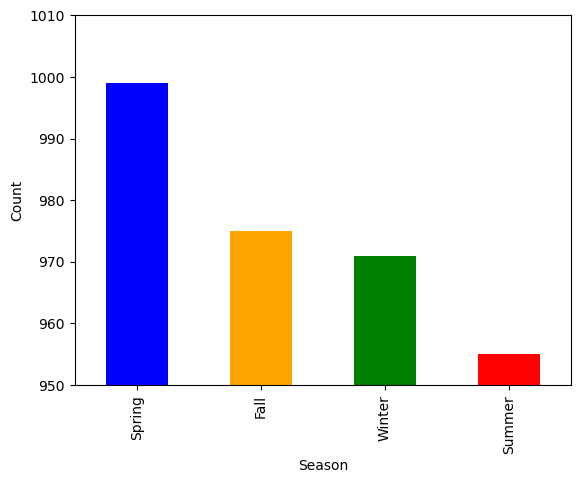

In [50]:
df["Season"]. \
    value_counts(). \
    plot(
        kind="bar",
        color=["blue", "orange",
                "green", "red"])
plt.ylabel("Count")
plt.ylim(950,1010)
plt.show()

Spring has almost 1000 counts. Fall and Winter counts are close in magnitude. Summer purchases seem to be relatively the lowest.

### Distribution of Purchases by Category

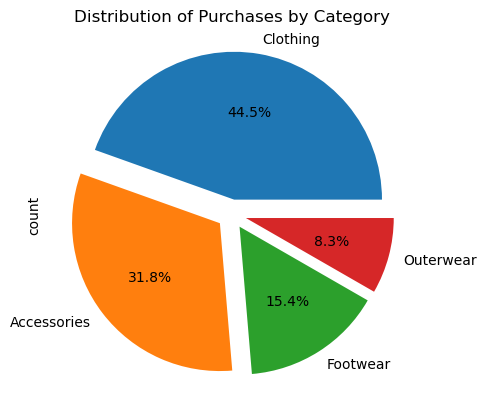

In [53]:
df["Category"]. \
    value_counts(). \
    plot(
        kind="pie",
        autopct='%1.1f%%',
        explode=(0.1, 0.1, 0.1, 0.1))
plt.title("Distribution of Purchases by Category")
plt.show()

- Clothing seems to be purchased the most.
- Outerwear seems to be purchased the least.

### Review Rating Tendency by Gender

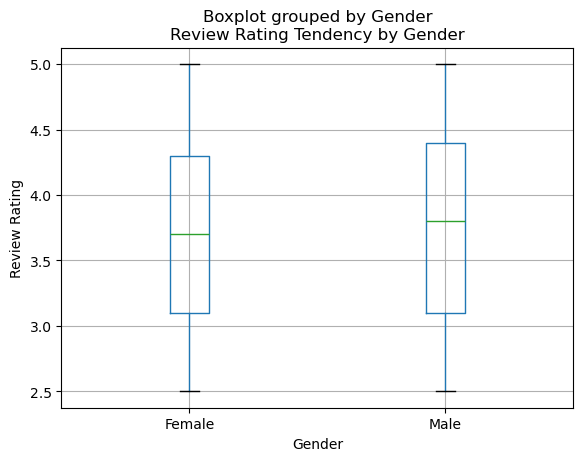

In [56]:
df.boxplot(column="Review Rating",
           by="Gender")
plt.title("Review Rating Tendency by Gender")
plt.xlabel("Gender")
plt.ylabel("Review Rating")
# plt.legend()
plt.show()

- The median rating for Males seem to be slightly higher than Females.
- It can be observed that the interquartile range for the male review rsting tendency is wider.

### Histogram of Purchasing Amount (USD)

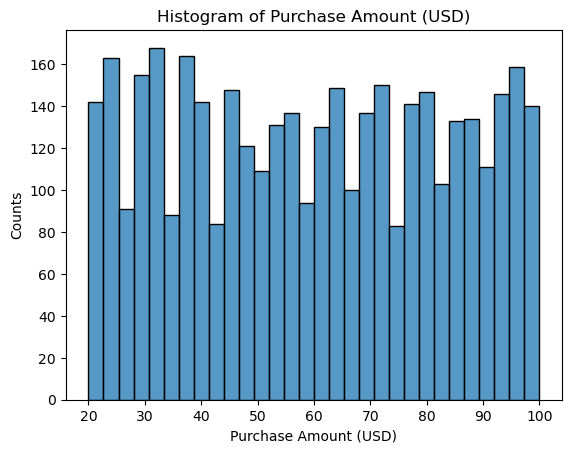

In [59]:
sns.histplot(x="Purchase Amount (USD)",
             data=df, bins=30)
plt.title("Histogram of Purchase Amount (USD)")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Counts")
plt.show()

### Reviewing Rating by Color

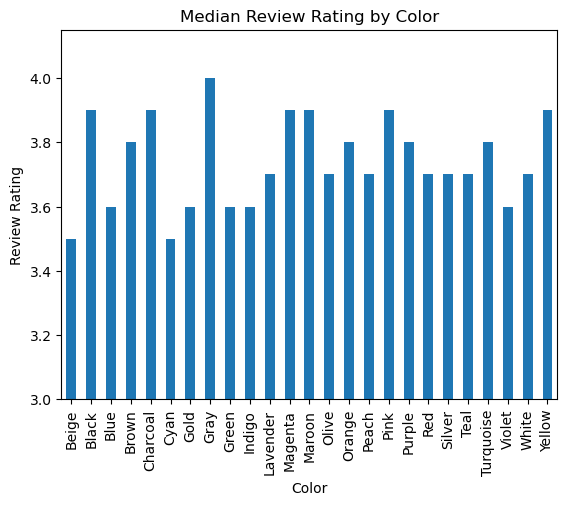

In [61]:
df.groupby("Color")["Review Rating"]. \
    median().plot(kind="bar")
plt.title("Median Review Rating by Color")
plt.xlabel("Color")
plt.ylabel("Review Rating")
plt.ylim(3.0, 4.15)
plt.show()

### Pie Chart of Payment Method Purchasing Amount

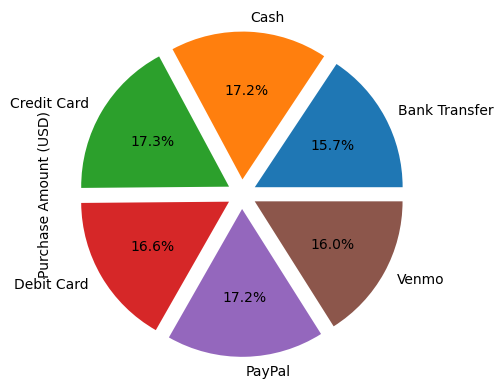

In [63]:
temp_df = df.groupby("Payment Method")["Purchase Amount (USD)"].sum()
temp_df.plot(kind="pie",
             autopct='%1.1f%%',
             explode=(0.1, 0.1,
                      0.1, 0.1,
                      0.1, 0.1))
plt.show()

### Purchase Amount by Season

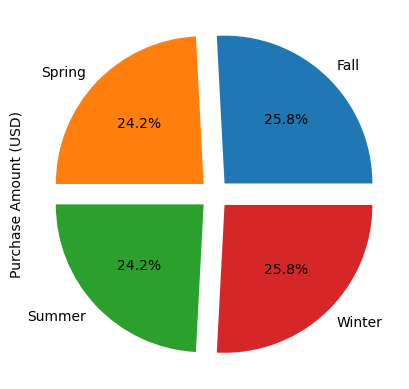

In [65]:
df.groupby("Season")["Purchase Amount (USD)"]. \
    median().plot(kind="pie",
               autopct='%1.1f%%',
               explode=(0.1, 0.1,
                        0.1, 0.1))
plt.show()